In [1]:
'''import packages'''

import cv2
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
import numpy as np
import skimage
import matplotlib.image as mpimg
from sklearn import decomposition, svm
from sklearn.preprocessing import StandardScaler
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import csv
import pandas as pd
import mediapipe as mp
from skimage.feature import hog
from sklearn.tree import DecisionTreeClassifier
import torch

In [2]:
"hog for feature extraction"
hog_faces = []
target = []
dir = os.getcwd()
for folder in os.listdir(dir + '\\testdata\\test' ):
    print(folder)
    i = 0
    for face in os.listdir(dir + '\\testdata\\test\\' + folder):
        i +=1
        image = cv2.imread( dir + '\\testdata\\test\\' + folder + "\\" + face)
        
        img = cv2.resize(image,(200,250))
        
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block = (2, 2), visualize=True, multichannel=True)
        hog_faces.append(hog_image)
        
    print(str(i)+" Faces")
print("Done processing...")

#import labels for faces
for file in os.listdir(dir + '\\testdata\\testlabel'):
    file = open(dir + '\\testdata\\testlabel\\' + file,"r")
    t = [list(map(int,rec)) for rec in csv.reader(file, delimiter=',')]
   
    target += t[0]
    file.close()
    
print("targets leangth: " + str(len(target)))

Facialispares 0 - Andrei - 1


C:\Users\oskar\AppData\Local\Temp\ipykernel_19800\647030535.py:14: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),cells_per_block = (2, 2), visualize=True, multichannel=True)


289 Faces
Facialispares 0 - Elsa - 1
323 Faces
Facialispares 0 - Nathalie - 1
230 Faces
Facialispares 0 - Oskar - 1
334 Faces
Facialispares 0 - Viktor - 1
256 Faces
Facialispares 1 - Andrei - 1
150 Faces
Facialispares 1 - Andrei - 2
130 Faces
Facialispares 1 - Nathalie - 1
89 Faces
Facialispares 1 - Nathalie - 2
110 Faces
Facialispares 1 - Oskar - 1
112 Faces
Facialispares 1 - Oskar - 2
146 Faces
Facialispares 1 - Viktor - 1
113 Faces
Facialispares 1 - Viktor - 2
119 Faces
Facialispares 3 - Andrei - 1
131 Faces
Facialispares 3 - Andrei - 2
172 Faces
Facialispares 3 - Nathalie - 1
58 Faces
Facialispares 3 - Nathalie - 2
91 Faces
Facialispares 3 - Oskar - 2
126 Faces
Facialispares 3 - Oskar - 3
100 Faces
Facialispares 3 - Viktor - 1
110 Faces
Facialispares 3 - Viktor - 2
119 Faces
Done processing...
targets leangth: 3308


In [3]:
target = []
for file in os.listdir(dir + '\\testdata\\testlabel'):
    file = open(dir + '\\testdata\\testlabel\\' + file,"r")
    t = [list(map(int,rec)) for rec in csv.reader(file, delimiter=',')]
   
    target += t[0]
    file.close()
    
print("targets leangth: " + str(len(target)))

targets leangth: 3308


C:\Users\oskar\AppData\Local\Temp\ipykernel_12816\1807320064.py:3: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=10, pixels_per_cell=(4, 4),


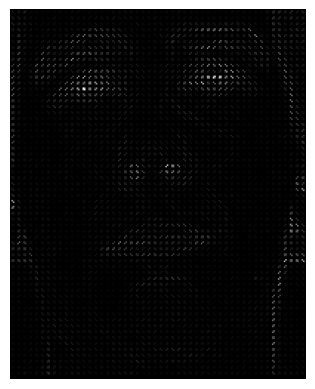

In [13]:
img = cv2.imread('faces\Facialispares 3 - Oskar - 1\Facialispares 3 - Oskar - 1frame1.jpg')
resized_img = cv2.resize(img, (200, 250))
fd, hog_image = hog(resized_img, orientations=10, pixels_per_cell=(4, 4),
                	cells_per_block=(8, 8), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [4]:
'''create a dataframe'''
face_data = []

for face in hog_faces:
    f = face.ravel()
    face_data.append(f)
    
print(len(face_data))

df = { 'faces': hog_faces,
      'target':target,
      'data': face_data 
}

df = pd.DataFrame(df) 
print(str(len(hog_faces)) + " Faces in dataframe")
print(str(len(face_data[0])) + " Features in a face")

3308
3308 Faces in dataframe
50000 Features in a face


In [5]:

"create a training and test set"

h,w = df.faces[0].shape
n_samples, n_labels = df.shape
# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = df.data.values.tolist()
y = df.target
n_features = len(X[1])
labels =["No stroke","Stroke"]
n_classes = len(labels)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X[:2000], y[:2000], test_size=0.25, random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Total dataset size:
n_samples: 3308
n_features: 50000
n_classes: 2


In [40]:
"NN model for classification"
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
"Fit model to data"

model.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

result = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test,y_test))

Epoch 1/20


C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


47/47 [==============================] - 2s 22ms/step - loss: 0.3030 - accuracy: 0.9060 - val_loss: 0.3351 - val_accuracy: 0.9460
Epoch 2/20
 1/47 [..............................] - ETA: 0s - loss: 0.6187 - accuracy: 0.9062

C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\backend.py:5016: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


47/47 [==============================] - 1s 19ms/step - loss: 0.1127 - accuracy: 0.9660 - val_loss: 0.1659 - val_accuracy: 0.9520
Epoch 3/20
47/47 [==============================] - 1s 18ms/step - loss: 0.0638 - accuracy: 0.9780 - val_loss: 0.1045 - val_accuracy: 0.9700
Epoch 4/20
47/47 [==============================] - 1s 17ms/step - loss: 0.0533 - accuracy: 0.9807 - val_loss: 0.1183 - val_accuracy: 0.9680
Epoch 5/20
47/47 [==============================] - 1s 18ms/step - loss: 0.0409 - accuracy: 0.9893 - val_loss: 0.0833 - val_accuracy: 0.9700
Epoch 6/20
47/47 [==============================] - 1s 17ms/step - loss: 0.0476 - accuracy: 0.9907 - val_loss: 0.1362 - val_accuracy: 0.9680
Epoch 7/20
47/47 [==============================] - 1s 18ms/step - loss: 0.0192 - accuracy: 0.9960 - val_loss: 0.1738 - val_accuracy: 0.9720
Epoch 8/20
47/47 [==============================] - 1s 18ms/step - loss: 0.0069 - accuracy: 0.9993 - val_loss: 0.0678 - val_accuracy: 0.9760
Epoch 9/20
47/47 [======

In [49]:
score = model.evaluate(X_test, y_test, verbose=0)
test = np.round(model.predict(X_test))
print('Test loss:', score[0])
print('Test accuracy:', score[1])
report = accuracy_score(y_test,test)
print(report)
nn_score = classification_report(y_test,test)
print(nn_score)

Test loss: 0.08308291435241699
Test accuracy: 0.9739999771118164
0.974
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       388
           1       0.92      0.96      0.94       112

    accuracy                           0.97       500
   macro avg       0.96      0.97      0.96       500
weighted avg       0.97      0.97      0.97       500



In [54]:
'''support vector machine'''
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
rbf_pred = rbf.predict(X_test)
svm_score = classification_report(y_test,rbf_pred)
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print(svm_score)

Accuracy (RBF Kernel):  77.60
              precision    recall  f1-score   support

           0       0.78      1.00      0.87       388
           1       0.00      0.00      0.00       112

    accuracy                           0.78       500
   macro avg       0.39      0.50      0.44       500
weighted avg       0.60      0.78      0.68       500



c:\Users\oskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oskar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
'''AdaBoost'''
adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth = 1),
    n_estimators = 200
)
adaboost.fit(X_train, y_train)
ada_pred = adaboost.predict(X_test)
ada_score = classification_report(y_test,ada_pred)
ada_accuracy = accuracy_score(y_test, ada_pred)
print('Accuracy (AdaBoost): ', "%.2f" % (ada_accuracy*100))
print(ada_score)

KeyboardInterrupt: 

In [26]:
"CNN model for classification"
CNN = tf.keras.Sequential()
CNN.add(layers.Conv2D(32, kernel_size = 3, padding = "valid", activation='relu', input_shape=(200,250,1)))
CNN.add(layers.MaxPooling2D(pool_size = (2, 2),strides = (1,1)))
CNN.add(layers.Conv2D(64, kernel_size = 3, padding = "valid", activation='relu'))
CNN.add(layers.MaxPooling2D(pool_size = (2, 2),strides = (1,1)))

CNN.add(layers.Flatten())
CNN.add(layers.Dense(64, activation='relu'))
CNN.add(layers.Dense(32, activation='relu'))
CNN.add(layers.Dense(1,activation = "sigmoid"))

CNN.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

In [27]:
X = hog_faces
# for i in X:
#     i.reshape(-1, 200, 250, 1)
#     np.asarray(i).astype(np.float32)
#     if i.shape != (250,200):
#         print(i.shape)
print(X[0].shape)

y = np.asarray(target)

n_features = len(X[1])
labels =["No stroke","Stroke"]
n_classes = len(labels)

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X[:10], y[:10], test_size=0.25, random_state=42
)
print(len(X_train))
print(len(y_train))
scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

(250, 200)
Total dataset size:
n_samples: 3308
n_features: 250
n_classes: 2
7
7


In [28]:
"Fit model to data"

X_train = tf.expand_dims(X_train, axis=-1)
print(X_train.shape)
X_train = tf.stack(X_train)
X_test = tf.stack(X_test)
CNN.compile(optimizer='adam', loss= tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

result = CNN.fit(X_train, y_train, epochs = 20, validation_data = (X_test,y_test))

(7, 250, 200, 1)
Epoch 1/20
1/1 [==============================] - ETA: 0s - loss: 0.5337 - accuracy: 1.0000

ValueError: in user code:

    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1323 test_function  *
        return step_function(self, iterator)
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1314 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1307 run_step  **
        outputs = model.test_step(data)
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\training.py:1266 test_step
        y_pred = self(x, training=False)
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\oskar\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\engine\input_spec.py:230 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_5 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 250, 200)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])